# Initial analysis

In [1]:
%load_ext autoreload
%autoreload 2

!python --version

Python 3.7.6


In [2]:
import sys
sys.path.append('..')

import pandas as pd
import numpy as np
import seaborn as sns

import os

import matplotlib.pyplot as plt

Load the data.

In [3]:
data = pd.read_csv('../data/fifa.csv', index_col=0)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 158023 to 246269
Data columns (total 87 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      18207 non-null  object 
 1   Age                       18207 non-null  int64  
 2   Photo                     18207 non-null  object 
 3   Nationality               18207 non-null  object 
 4   Flag                      18207 non-null  object 
 5   Overall                   18207 non-null  int64  
 6   Potential                 18207 non-null  int64  
 7   Club                      17966 non-null  object 
 8   Club Logo                 18207 non-null  object 
 9   Value                     18207 non-null  object 
 10  Wage                      18207 non-null  object 
 11  Special                   18207 non-null  int64  
 12  Preferred Foot            18159 non-null  object 
 13  International Reputation  18159 non-null  float64
 14  

## Columns, data types, sample values...

In [5]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

print("Number of numberic attributes - " + str(len(data.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']).columns)))
print("Number of categorical attributes - " + str(len(data.select_dtypes(include=['object']).columns)))


Number of numberic attributes - 42
Number of categorical attributes - 45


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 158023 to 246269
Data columns (total 87 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      18207 non-null  object 
 1   Age                       18207 non-null  int64  
 2   Photo                     18207 non-null  object 
 3   Nationality               18207 non-null  object 
 4   Flag                      18207 non-null  object 
 5   Overall                   18207 non-null  int64  
 6   Potential                 18207 non-null  int64  
 7   Club                      17966 non-null  object 
 8   Club Logo                 18207 non-null  object 
 9   Value                     18207 non-null  object 
 10  Wage                      18207 non-null  object 
 11  Special                   18207 non-null  int64  
 12  Preferred Foot            18159 non-null  object 
 13  International Reputation  18159 non-null  float64
 14  

In [7]:
print(f'in the dataset there are {len(data.columns)} columns')

in the dataset there are 87 columns


In [8]:
print(f'in the dataset there are {len(data)} rows (players)')

in the dataset there are 18207 rows (players)


Show some sample data...

In [9]:
data.head()

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
ID,,,,,,,,,,,,,,,,,,,,,
158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [10]:
data.describe()

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,18159.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,49.734181,45.550911,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,18.364524,19.525820,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


## Missing values

Examine the missing values in the dataset.

In [11]:
# https://github.com/ResidentMario/missingno
!pip install missingno

import missingno as msno

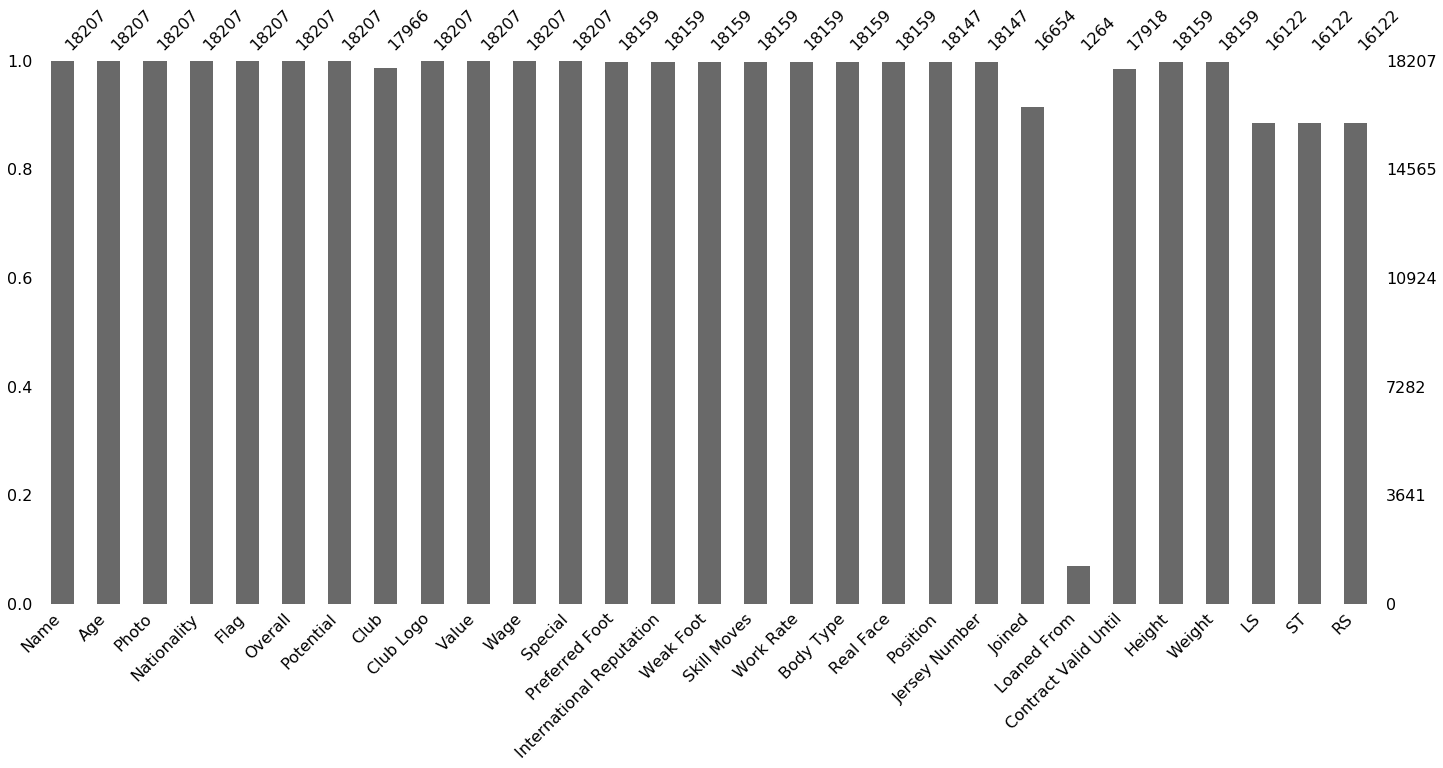

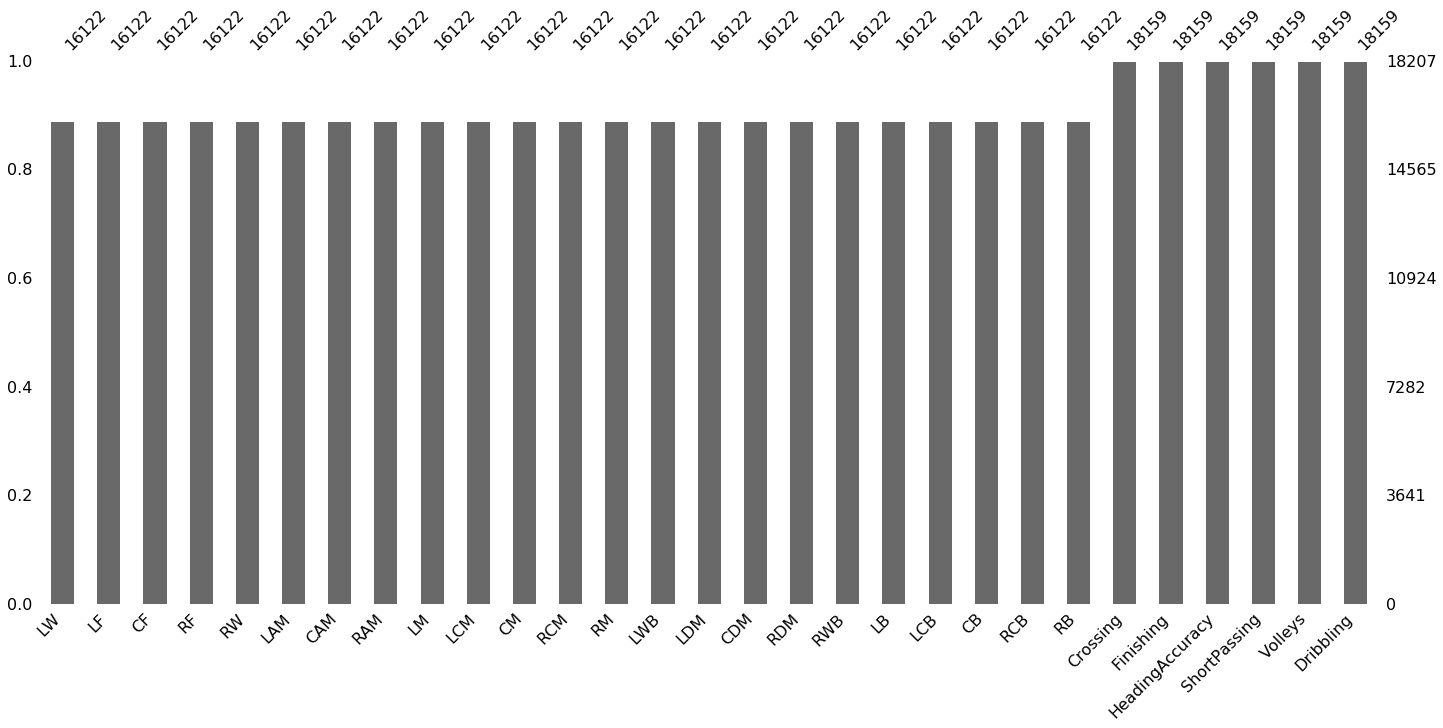

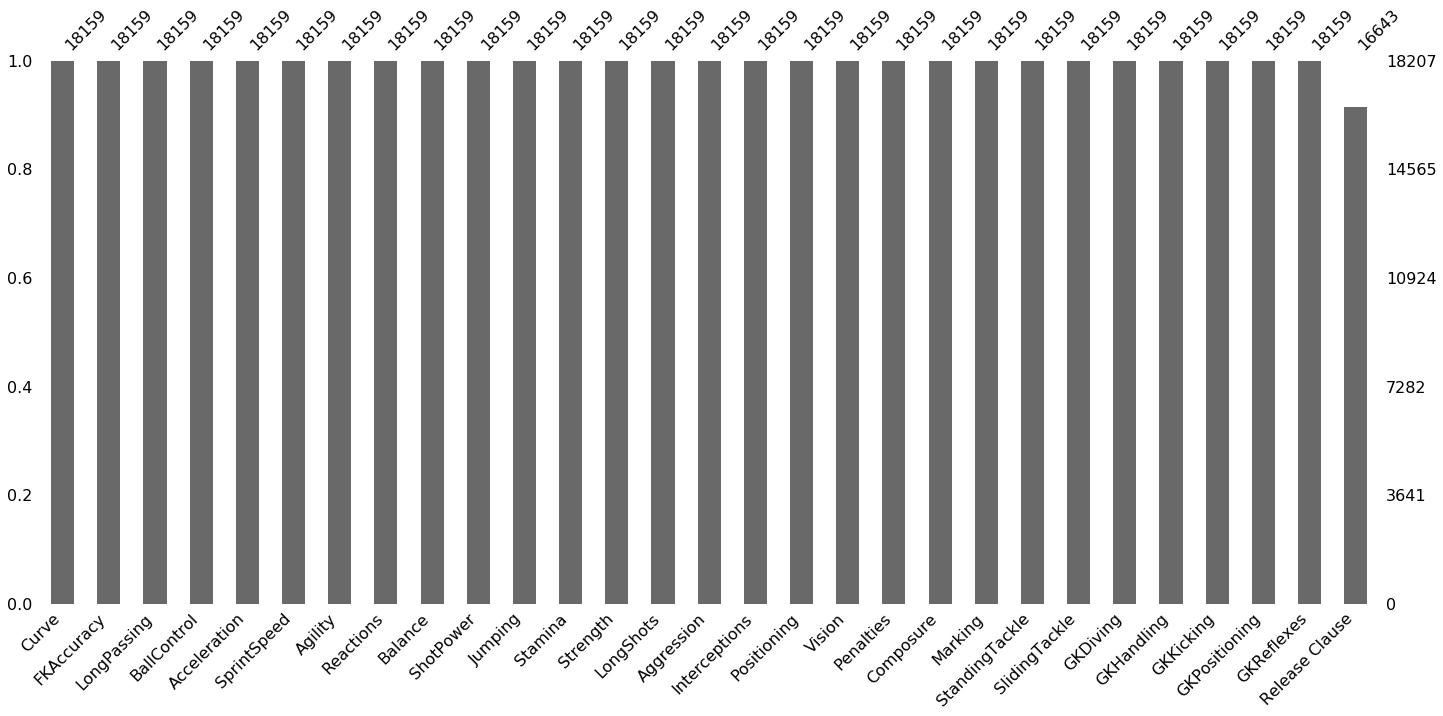

In [12]:
plot_count = 3
column_groups = np.array_split(data.columns, plot_count)

for columns in column_groups:
    msno.bar(data[columns])
    plt.show()

In [13]:
print(f'Since we have too many columns we plotted the data {plot_count} times.')

Since we have too many columns we plotted the data 3 times.


We can see that, we miss some data in following columns:
- `Club` - as some players can be "free agent" and without the club
- `Jersey Number` - some players might not have a jersey number when they are without he club
- `Joined` - indicates when a player joined the club, not sure why there are a missing values
- `Loaned From` - not every player is on loan somewhere
- `Contract Valid Until` - some players might miss this value, espacially those without the club
- `LS`, `ST`, `RS`, `LW`, `LF`, `CF`, `RW`, `LAM`, `RAM`, `LM`, `LCM`, `CM`, `RCM`, `RM`, `LWB`, `LDM`, `RDM`, `LB`, `LCB`, `RCB`, `RB` - these are the positions that player can play, not sure why these columns are missing some values, we need to examine it
- `Release Clause` - this is ok, some players may have release clause in their contract

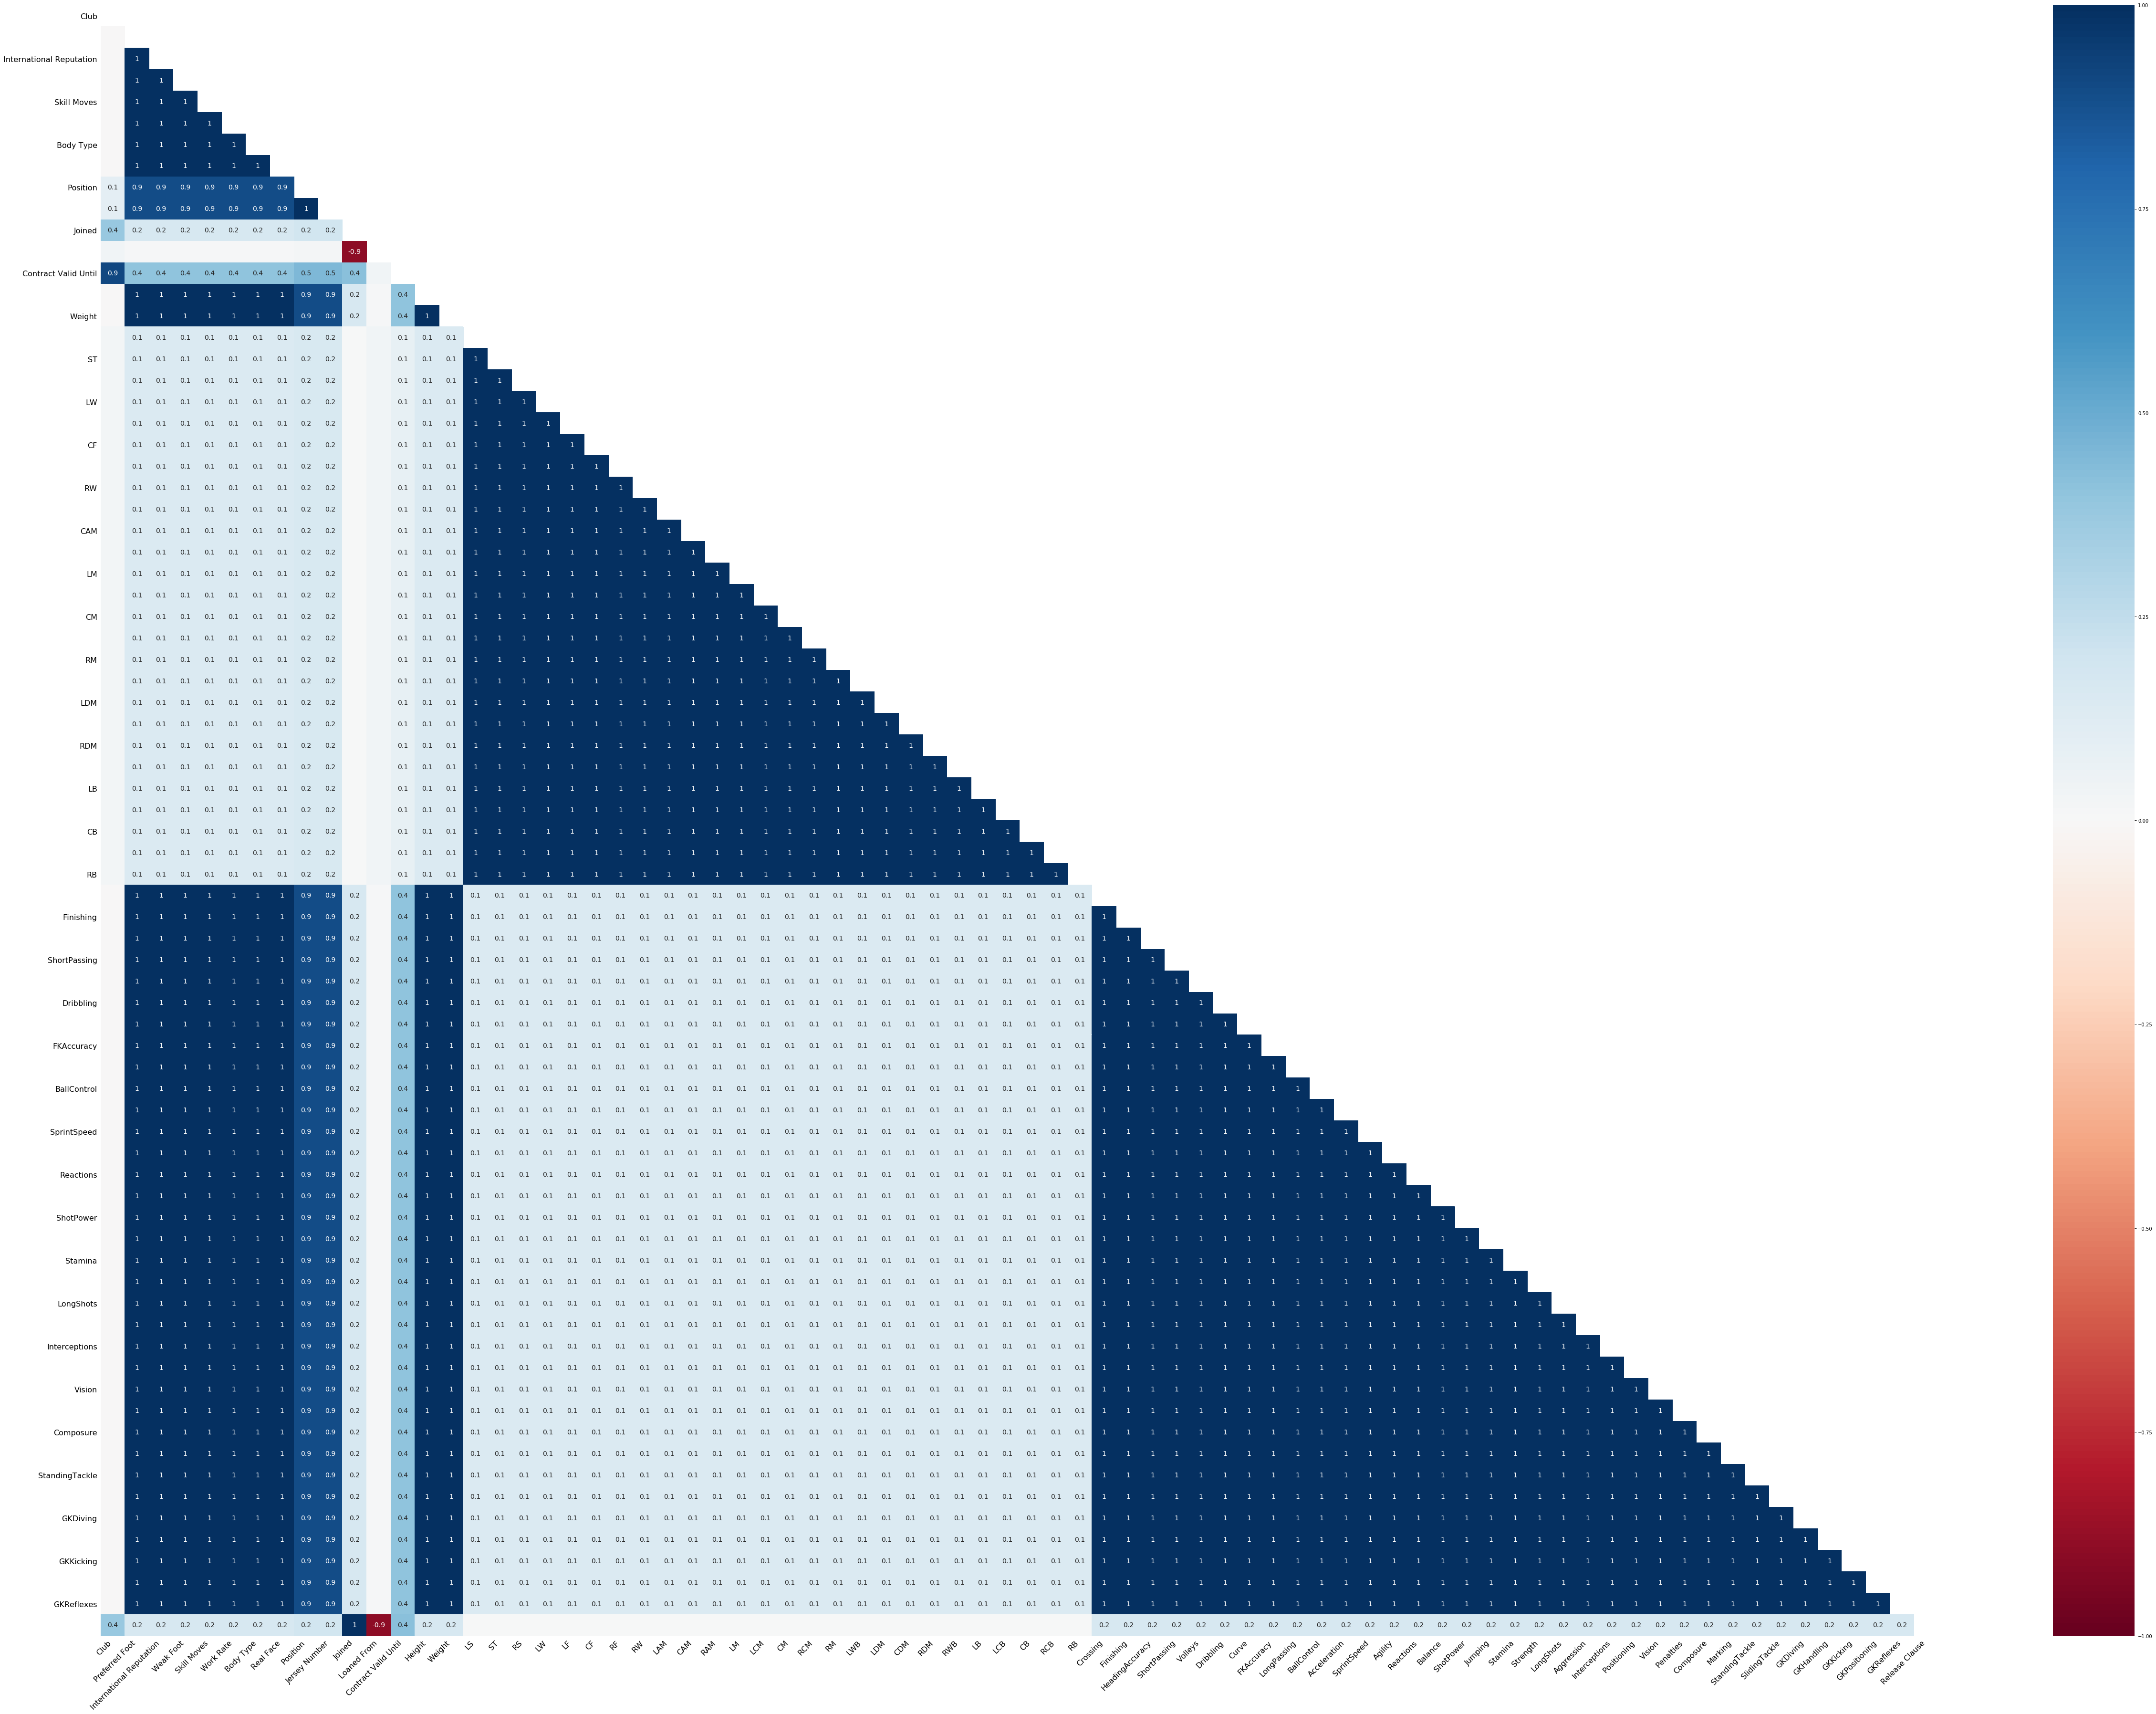

In [14]:
plot = msno.heatmap(data)

fig = plot.figure

fig.set_size_inches(70, 50)
fig.set_tight_layout(True)

Hint how to interpret the plot above [(reference)](https://github.com/ResidentMario/missingno#heatmap),
> Nullity correlation ranges from -1 (if one variable appears the other definitely does not) to 0 (variables appearing or not appearing have no effect on one another) to 1 (if one variable appears the other definitely also does).

We plot the correlation between the missing values. We can notice that when some player miss a value from `LW`, `LF`, `CF`, `RW`, `LAM`, `RAM`, `LM`, `LCM`, `CM`, `RCM`, `RM`, `LWB`, `LDM`, `RDM`, `LB`, `LCB`, `RCB`, `RB` they miss the rest of them.

We can also see that when plater is on loan, they will most likely not have a release close.

### Denrogram

Hint how to interpret the plot below [(reference)](Hint how to interpret the plot above [(reference)](https://github.com/ResidentMario/missingno#heatmap)),
> The dendrogram allows you to more fully correlate variable completion, revealing trends deeper than the pairwise ones visible in the correlation heatmap. To interpret this graph, read it from a __top-down__ perspective. Cluster leaves which linked together at a distance of zero fully predict one another's presence—one variable might always be empty when another is filled, or they might always both be filled or both empty, and so on. Cluster leaves which split close to zero, but not at it, predict one another very well, but still imperfectly.

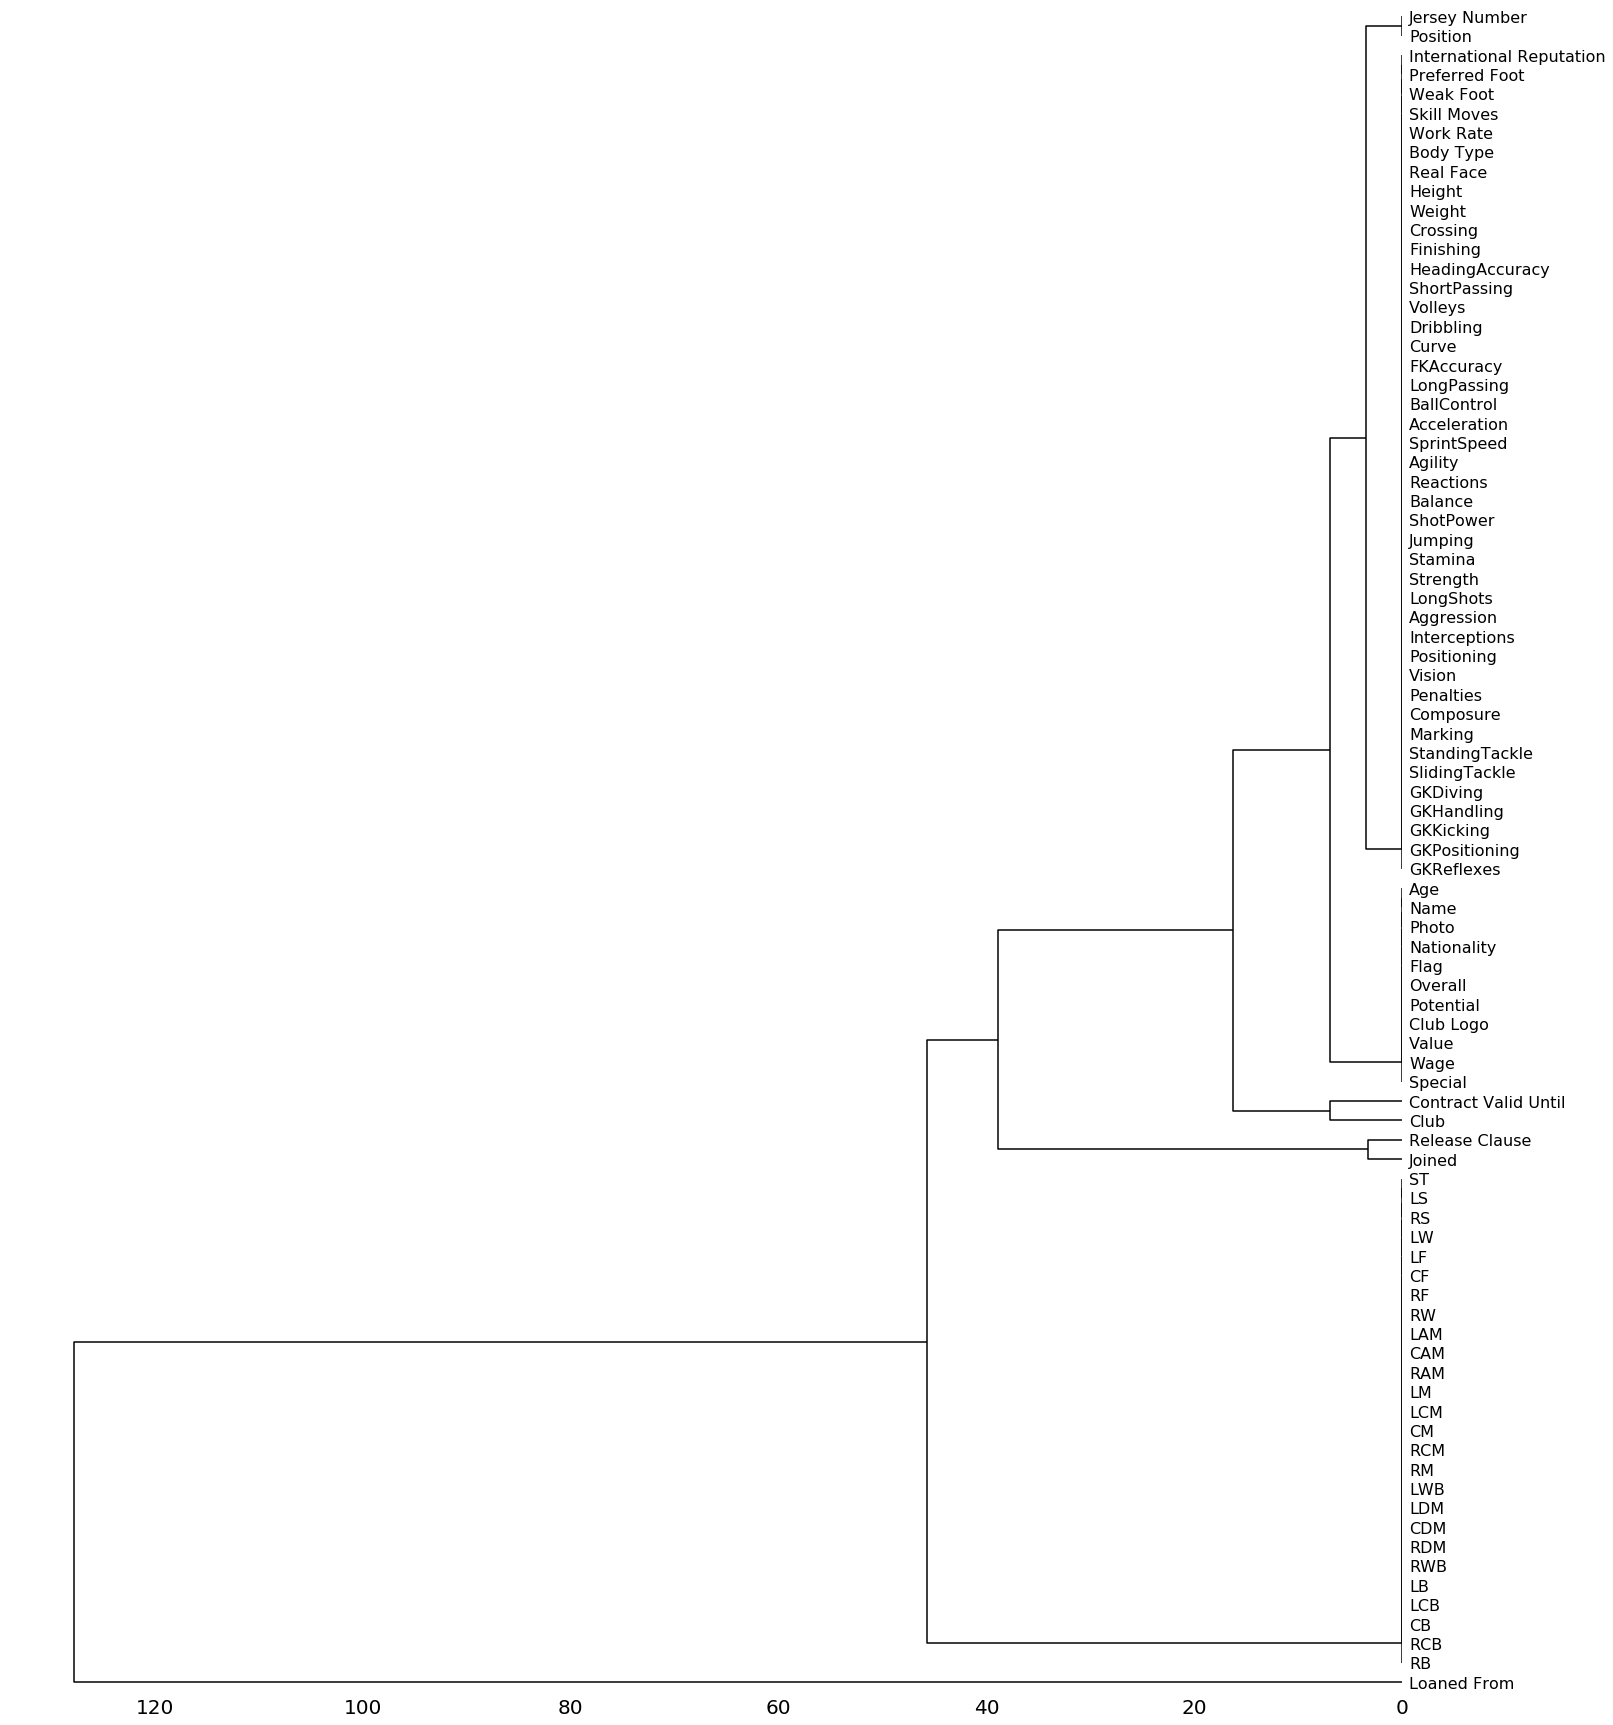

In [15]:
msno.dendrogram(data)

The dendogram confirms that statement stated above about columns `ST`, `LS`.
Also we can see cluster `Release Clause` and `Joined`. This cluster also make sense, if player did not join a club, they cannot have a release clause in their contract.
Another cluster `Contract Valid Until` and `Club` shows us the player cannot have a contract expiration if they are not a part of any club.

### Attributes `LS`, `ST`...

Now we will examine which players have `LS`, `ST`... values empty.

In [16]:
specific_positions = ['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RW', 'LAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'RDM', 'LB', 'LCB', 'RCB', 'RB']

In [17]:
data_wo_positions = data[data['LW'].isna()]
data_wo_positions.head()

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
ID,,,,,,,,,,,,,,,,,,,,,
193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
200389,J. Oblak,25,https://cdn.sofifa.org/players/4/19/200389.png,Slovenia,https://cdn.sofifa.org/flags/44.png,90,93,Atlético Madrid,https://cdn.sofifa.org/teams/2/light/240.png,€68M,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,€144.5M
192448,M. ter Stegen,26,https://cdn.sofifa.org/players/4/19/192448.png,Germany,https://cdn.sofifa.org/flags/21.png,89,92,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€58M,...,69.0,25.0,13.0,10.0,87.0,85.0,88.0,85.0,90.0,€123.3M
192119,T. Courtois,26,https://cdn.sofifa.org/players/4/19/192119.png,Belgium,https://cdn.sofifa.org/flags/7.png,89,90,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,€53.5M,...,66.0,20.0,18.0,16.0,85.0,91.0,72.0,86.0,88.0,€113.7M
167495,M. Neuer,32,https://cdn.sofifa.org/players/4/19/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,89,89,FC Bayern München,https://cdn.sofifa.org/teams/2/light/21.png,€38M,...,70.0,17.0,10.0,11.0,90.0,86.0,91.0,87.0,87.0,€62.7M


It seems that only goalkepers might have this value empty.

In [18]:
data_wo_positions['Position'].value_counts()

GK    2025
Name: Position, dtype: int64

Only goalkeeprs do have these (`LS`, `ST`...) values empty. These columns means specific positions. `LS` stands for `left striker`, `ST` for `striker` or `LCM` for `Left Central Midfielder` Since these values are numeric they might indicate how much player fits that specific position on scale form 0 to 100.

We can do a regression task and try to predict the values for these columns based on the player skills. This means we will try to predict the _how player fits_ the specific position on the field based on their skills.

In [19]:
data_w_positions = data[data['LW'].notna()]

data_w_positions[['LS', 'ST']].head()

,LS,ST
ID,,
158023,88+2,88+2
20801,91+3,91+3
190871,84+3,84+3
192985,82+3,82+3
183277,83+3,83+3


We may notice that there is a `+` between the two values. The left value is "fit to that position" and the right one is potentional grow.

## Analysis

In [20]:
from src.analysis import plot_categoric_attribute, plot_discrete_attribute, get_numberic_columns

ImportError: cannot import name 'get_numberic_columns' from 'src.analysis' (../src/analysis.py)

In [ ]:
plot_discrete_attribute(data, 'Age')

We can notice that we have some outliers on our dataset (too old players).

In [ ]:
plot_categoric_attribute(data, 'Nationality', count=20)

We can notice that the most players in the game are from England. This might be because there are most English leagues in the game.

In [ ]:
plot_categoric_attribute(data, 'Height', count=20)

In [ ]:
plot_categoric_attribute(data, 'Wage', count=40)

The age is represented in inches and as a string, we need to convert it to the number during in the preprocessing.

## Correlation between attributes

In [ ]:
from src.analysis import heat_map

In [ ]:
data_only_numeric_attributes = get_numberic_columns(data)
data_only_numeric_attributes = data_only_numeric_attributes.dropna()

data_only_numeric_attributes.head()

In [ ]:
from IPython.display import Image

file_path = 'pairwise_correlations.png'

if not os.path.exists(file_path):
    heat_map_plot = heat_map(data_only_numeric_attributes, figsize=(30, 30))
    heat_map_plot.savefig('pairwise_correlations.png')
    
Image(file_path, unconfined=True)

We can notice a strong correlation between golkeepers attributes (`GKDiving`, `GKHandling`...) and also between other attibures like `BallControl` and `Dribling`, `SprintSpeed` and `Acceleration` and multiple others pairs.

After preprocessing we will be able to create even bigger correlation map, after we convert attributes such as `Height` or specific positions (`LS`, `ST`...) to numbers. `LS`, `ST`... type is currently `object` because of the `nan` values.

## Possible prediction tasks

__Regression__
- predict players market value (attribute `Value`)
- predict players wage (attribute `Wage`)
- predict players fit to the specific positions  (attributes `LS`, `ST`...)

__Classification__
- predict players position (attribute `Position`)

# Conclusion

We made a simple analysis on our dataset and we outlined the preprocessing steps that needs to be done.

We quickly looked at some of the attributes in the dataset and we need to make a deeper analysis on the rest of the dataset.

We also outlined the prediction tasks that we would like to work on.